**Time** series Forecasting

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_error

Data ingestion (Store, features,train dataset)


In [80]:
train=pd.read_csv('train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [81]:
features=pd.read_csv('features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [82]:
stores=pd.read_csv('stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [83]:
merge1=features.merge(stores,on='Store',how='inner')
df=merge1.merge(train,on=['Store','Date','IsHoliday'],how='inner')

In [84]:

print(train.shape)
print(features.shape)
print(stores.shape)
print(df.shape)

(421570, 5)
(8190, 12)
(45, 3)
(421570, 16)


In [85]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [86]:
df.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48
421569,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,98,1076.80


In [87]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [88]:
stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [89]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [90]:
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [92]:
df.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479
MarkDown4,286603
MarkDown5,270138
CPI,0


Data Preprocessing

In [93]:
df=df.rename(columns={'MarkDown1':'Promation_1','MarkDown2':'Promation_2','MarkDown3':'Promation_3','MarkDown4':'Promation_4','MarkDown5':'Promation_5'})
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'Promation_1',
       'Promation_2', 'Promation_3', 'Promation_4', 'Promation_5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

In [94]:
df.fillna(0,inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   Promation_1   421570 non-null  float64
 5   Promation_2   421570 non-null  float64
 6   Promation_3   421570 non-null  float64
 7   Promation_4   421570 non-null  float64
 8   Promation_5   421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [96]:
df['IsHoliday'].unique()

array([False,  True])

In [97]:
df['IsHoliday']=df['IsHoliday'].astype(str)
df['IsHoliday']=df['IsHoliday'].str.strip()
df['IsHoliday']=df['IsHoliday'].replace({'True':1,'False':0})
df['IsHoliday']=df['IsHoliday'].astype(int)

In [98]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [99]:
df['Type']=df['Type'].astype(str)
df['Type']=df['Type'].str.strip()
df['Type']=df['Type'].replace({'A':1,'B':2,'C':3})
df['Type']=df['Type'].astype(int)

In [100]:
df.head()

,Store,Date,Temperature,Fuel_Price,Promation_1,Promation_2,Promation_3,Promation_4,Promation_5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,5,32229.38


In [101]:
df['Date']=pd.to_datetime(df['Date'])

In [102]:
df['Date'].dtype

dtype('<M8[ns]')

Data of Store 1 and Department 1

In [103]:
data=df[['Date','Weekly_Sales','Store','Dept']]
data=data.set_index('Date')
data.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [104]:
data.Store.shape

(421570,)

In [105]:
data=data[(data['Store']==1)& (data['Dept']==1)]

In [106]:
data.Store.shape

(143,)

In [107]:
print(data.Store.unique())
print(data.Dept.unique())

[1]
[1]


In [108]:
data=data.drop('Store',axis=1)
data=data.drop('Dept',axis=1)
data.head(1)

,Weekly_Sales
Date,
2010-02-05,24924.5


In [109]:
data['Weekly_Sales'].sort_values().head()

,Weekly_Sales
Date,
2011-08-26,14537.37
2011-08-12,14539.79
2011-08-19,14689.24
2010-05-21,14773.04
2011-06-17,14978.09


In [110]:
data.tail()

,Weekly_Sales
Date,
2012-09-28,18947.81
2012-10-05,21904.47
2012-10-12,22764.01
2012-10-19,24185.27
2012-10-26,27390.81


In [111]:
data.to_csv('tsd.csv')

Exploratory Data Analysis

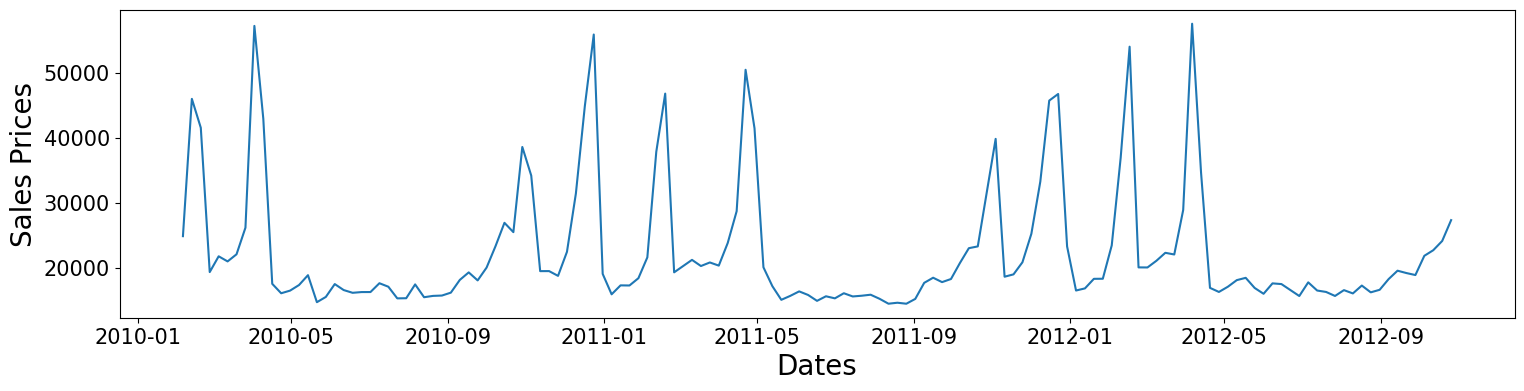

In [112]:
plt.figure(figsize=(18,4))
plt.plot(data.Weekly_Sales)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

To observe outliers

<Axes: ylabel='Weekly_Sales'>

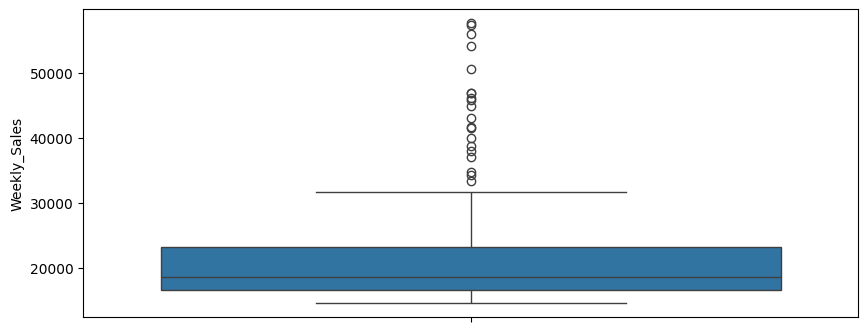

In [113]:
plt.figure(figsize=(10,4))
sns.boxplot(data['Weekly_Sales'])


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

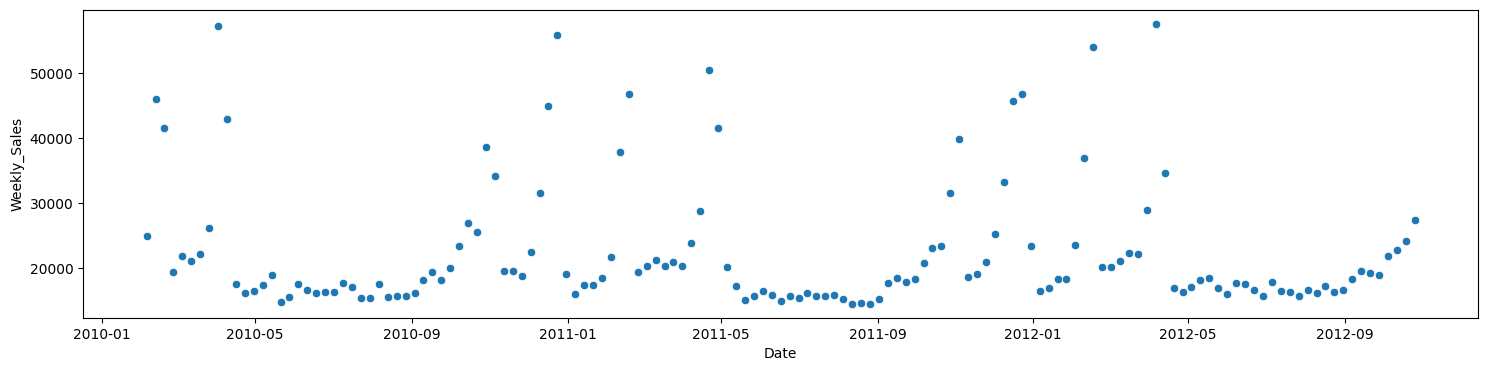

In [114]:
plt.figure(figsize=(18,4))
sns.scatterplot(data['Weekly_Sales'])

Seasonality Check

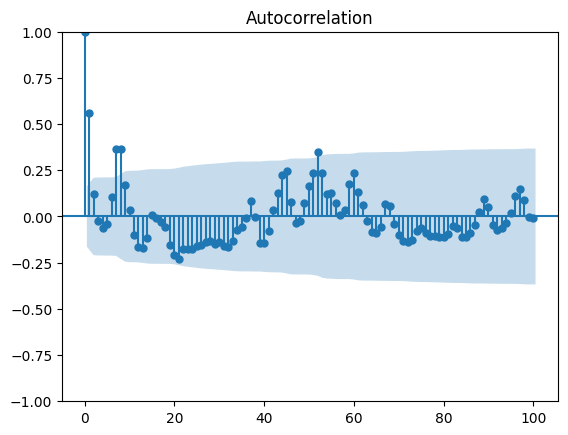

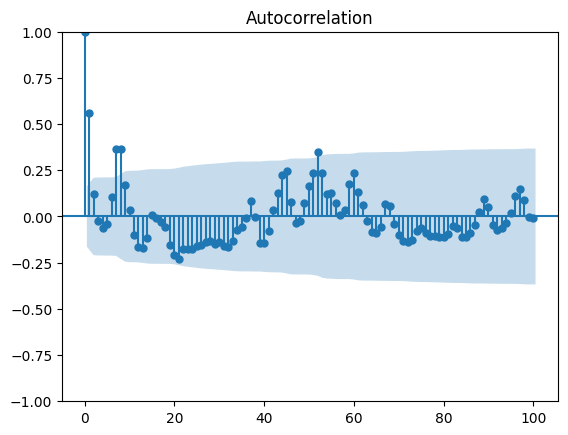

In [115]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['Weekly_Sales'],lags=100)


Seasonalndecompose

lag 1 last week affect this week ,lag 7,8 also same ,52 is a strong seasonal pattern,
we cant peak repeats for every 7 lags ,we can cleary say it is a yearly season data


<Figure size 2000x800 with 0 Axes>

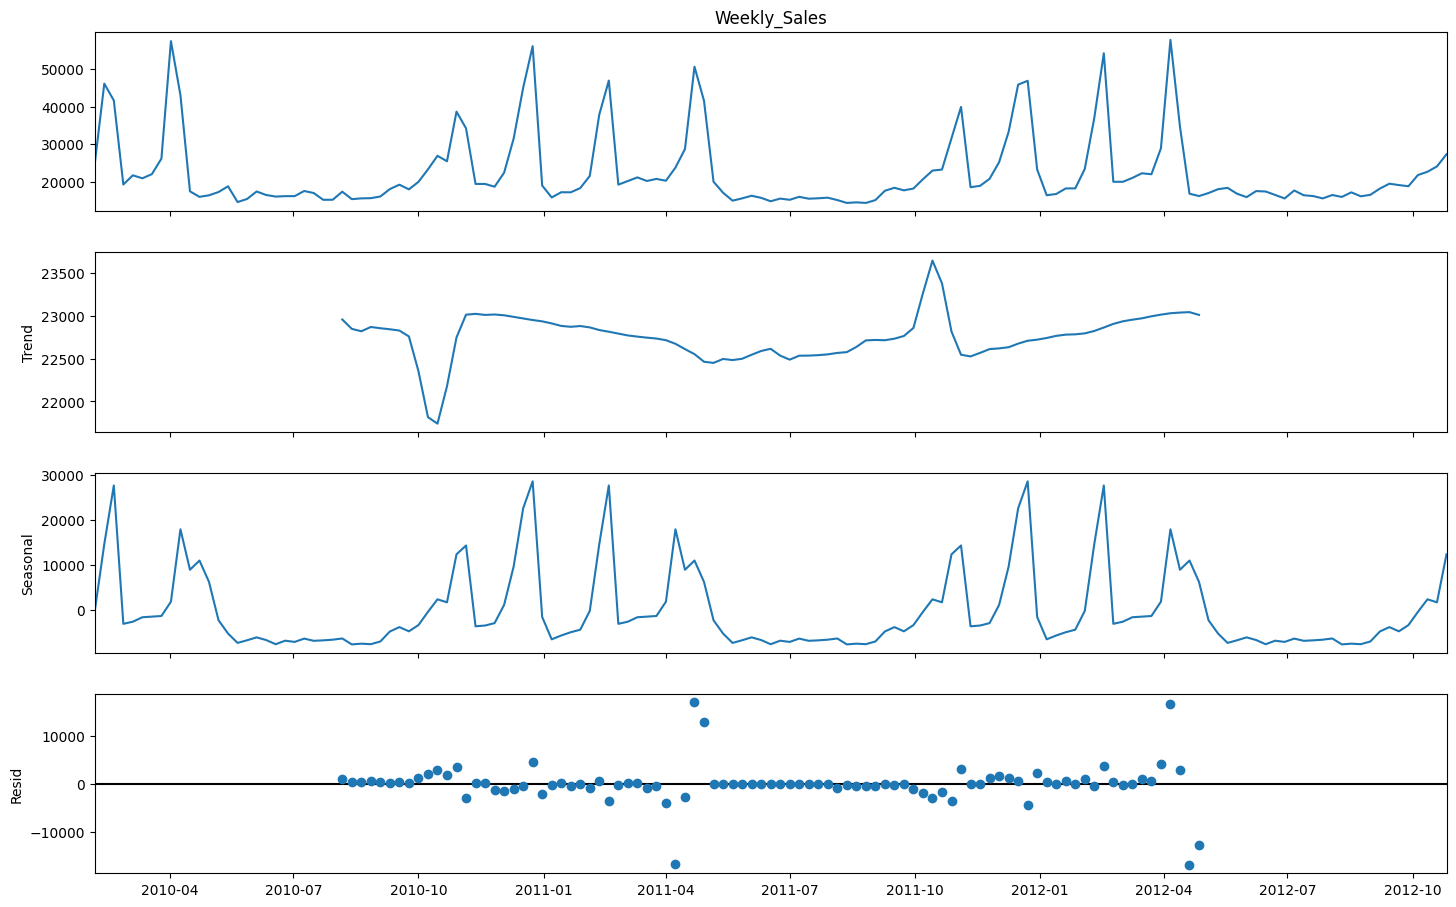

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_decompse=seasonal_decompose(data["Weekly_Sales"],model= "additive",period=52)
plt.figure(figsize=(20,8))
fig=result_decompse.plot()
fig.set_size_inches(17,10)

Data(train,test) plot

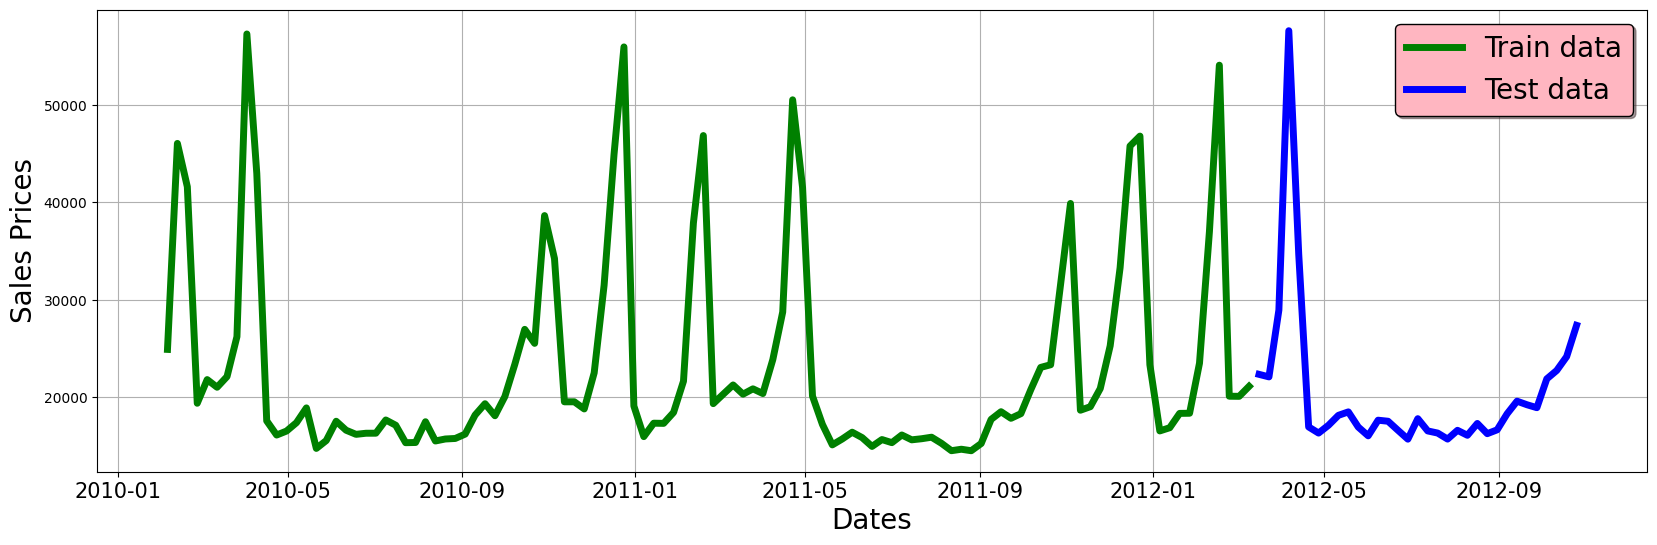

In [117]:
train_plot=data['Weekly_Sales'].iloc[:110]
test_plot=data['Weekly_Sales'].iloc[110:]
plt.figure(figsize=(20,6))
#plt.grid("both")
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_plot, color='green', label='Train data', linewidth = 5)
plt.plot(test_plot,color='blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

STATIONARY TEST USING DICKEY FULLER TEST

In [118]:
data_sale=data['Weekly_Sales']


In [119]:
from statsmodels.tsa.stattools import adfuller

In [120]:
def test(datas):

    rolmean = datas.rolling(4).mean() # rolling mean
    rolstd = datas.rolling(4).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,5))
    plt.grid('both')

    plt.plot(datas, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)

    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    plt.show(block=False)

    result=adfuller(datas,autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

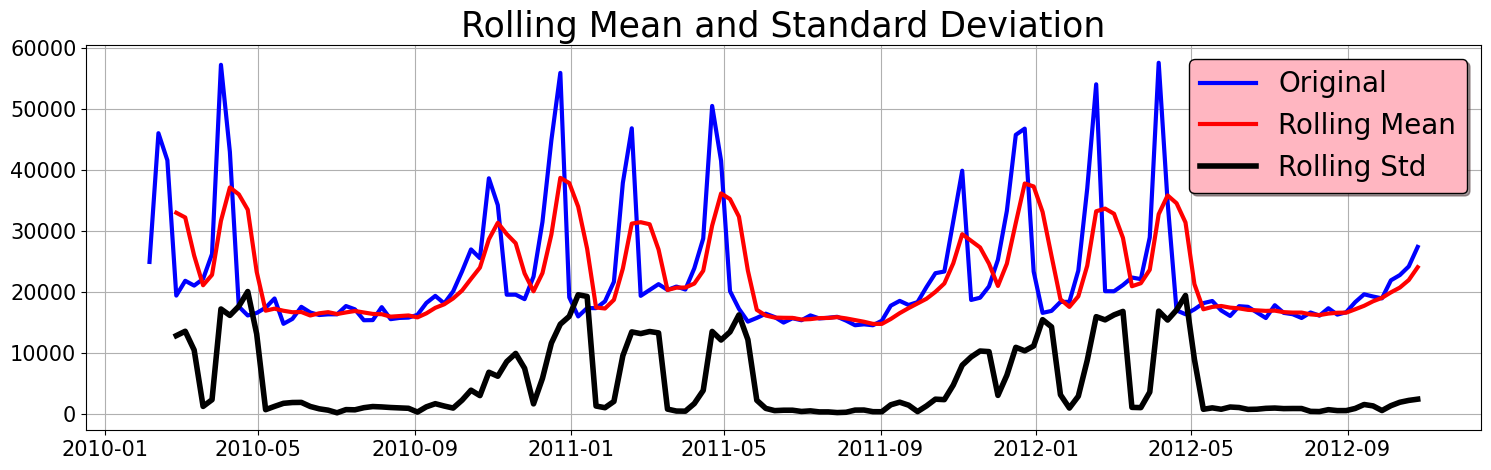

ADF Statistic: -2.5221638686500367
n_lags: 0.11017432282586997
p-value: 0.11017432282586997
Critial Values:
   1%, -3.4793722137854926
Critial Values:
   5%, -2.8830370378332995
Critial Values:
   10%, -2.578233635380623


In [121]:
test(data_sale)

Now Data is Statinary with lag 1

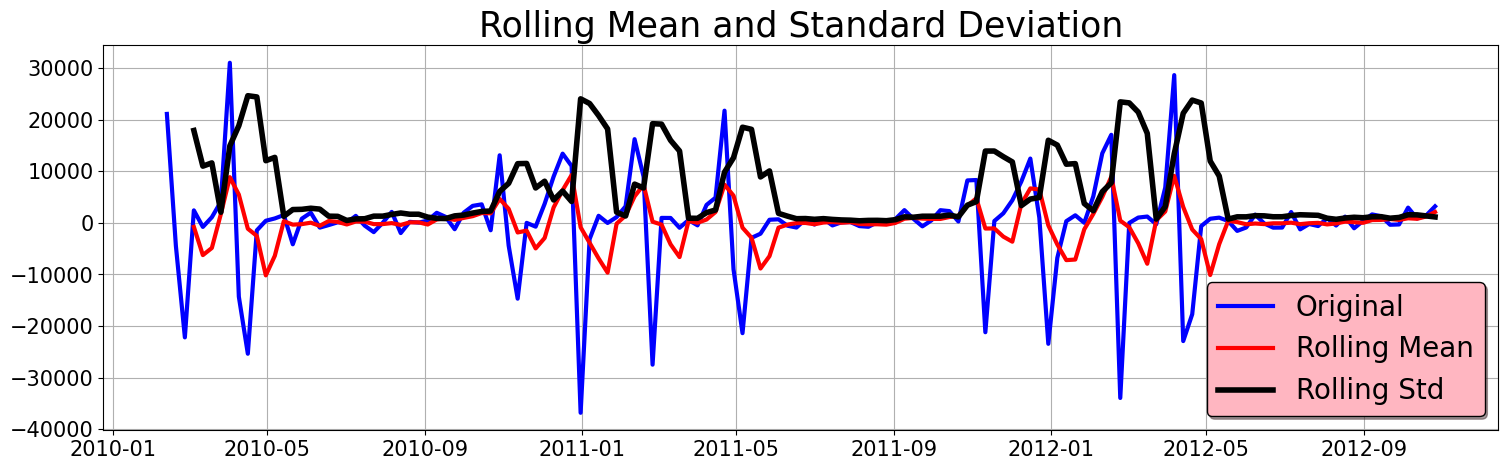

ADF Statistic: -11.044311466768818
n_lags: 5.269934445888141e-20
p-value: 5.269934445888141e-20
Critial Values:
   1%, -3.4793722137854926
Critial Values:
   5%, -2.8830370378332995
Critial Values:
   10%, -2.578233635380623


In [122]:
data_sale_lag_1=data_sale.diff()# lag 1
data_sale_lag_1=data_sale_lag_1.dropna()
test(data_sale_lag_1)

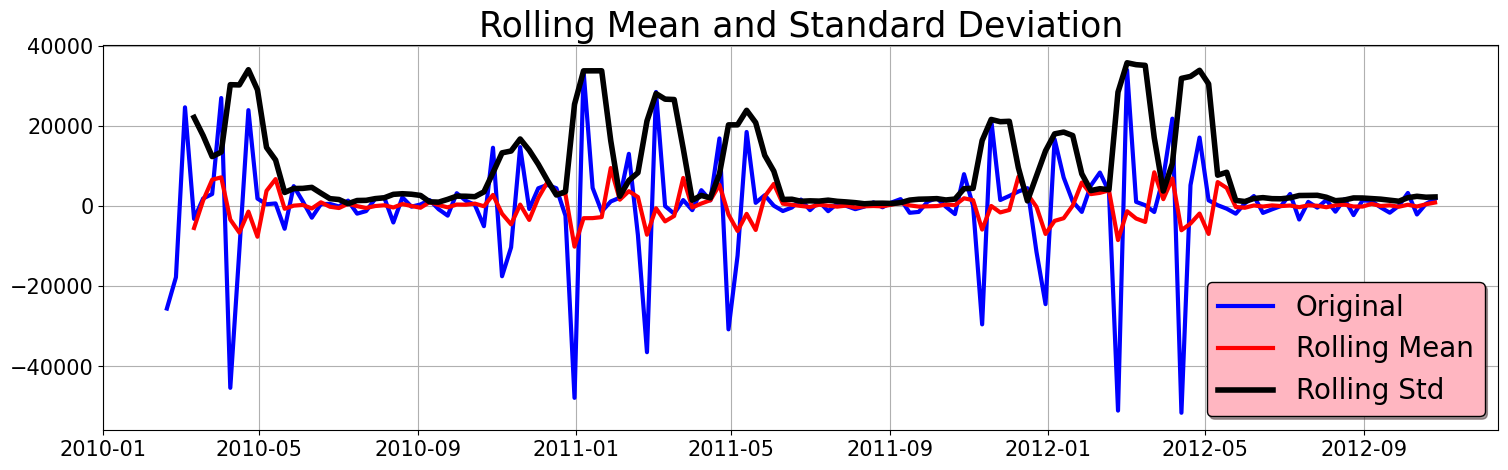

ADF Statistic: -6.594555356950847
n_lags: 6.978121947211588e-09
p-value: 6.978121947211588e-09
Critial Values:
   1%, -3.482920063655088
Critial Values:
   5%, -2.884580323367261
Critial Values:
   10%, -2.5790575441750883


In [123]:
data_sale_lag_2=data_sale_lag_1.diff().dropna()# lag 2
test(data_sale_lag_2)

Transformation (log+difference of lag 1)

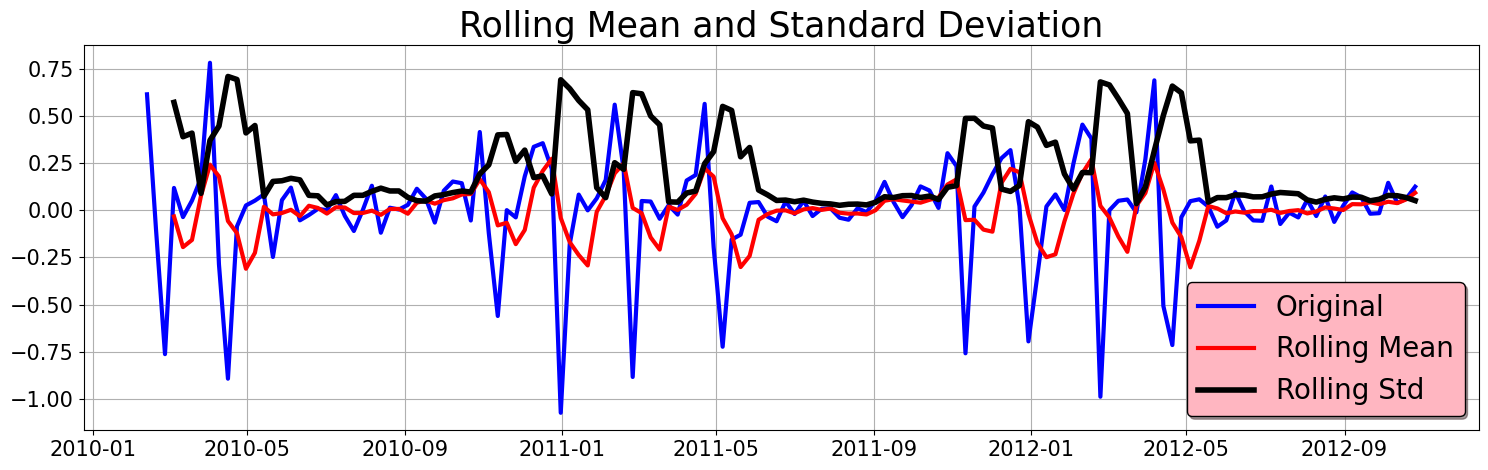

ADF Statistic: -10.204991370468102
n_lags: 5.8360266482025616e-18
p-value: 5.8360266482025616e-18
Critial Values:
   1%, -3.4793722137854926
Critial Values:
   5%, -2.8830370378332995
Critial Values:
   10%, -2.578233635380623


In [124]:
data_log_lag1=np.log1p(data_sale) #log and diff      good
data_log_lag1=data_log_lag1.diff().dropna()
test(data_log_lag1)

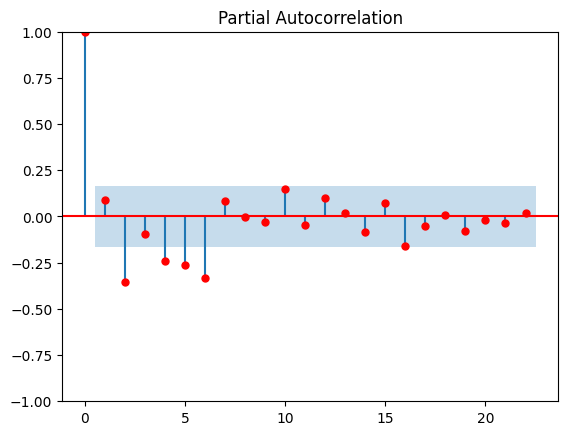

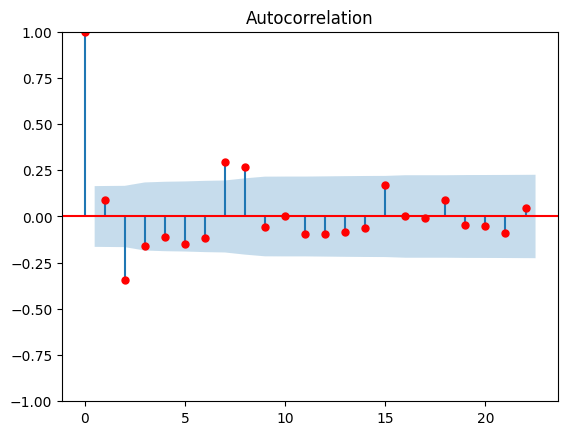

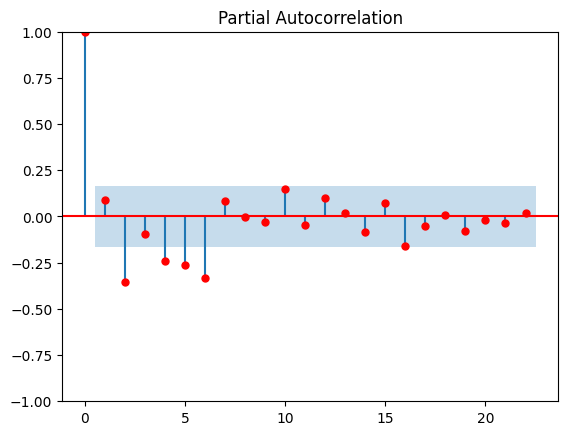

In [125]:
plot_acf(data_log_lag1,color='red')
plot_pacf(data_log_lag1,color='red')

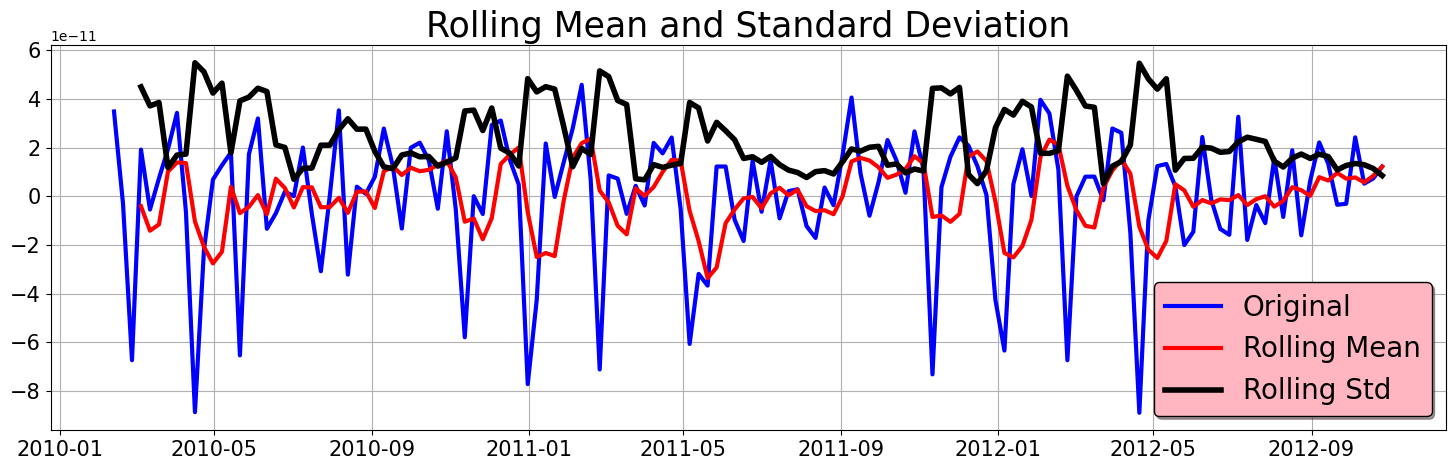

ADF Statistic: -4.26365464809174
n_lags: 0.0005131855547415072
p-value: 0.0005131855547415072
Critial Values:
   1%, -3.480118600110386
Critial Values:
   5%, -2.8833618426136196
Critial Values:
   10%, -2.578407034974382


In [126]:
from scipy.stats import boxcox# after box and diff
import numpy as np

ts_positive = data_sale[data_sale> 0]
ts_boxcox, lam = boxcox(ts_positive)
tss=pd.Series(ts_boxcox,index=data_sale.index)
data_box=tss.diff().dropna()
test(data_box)

Split data into train/test

In [127]:
log_data=np.log1p(data_sale)
log_data.tail()

,Weekly_Sales
Date,
2012-09-28,9.849496
2012-10-05,9.994492
2012-10-12,10.032980
2012-10-19,10.093540
2012-10-26,10.217999


In [128]:
train=log_data.iloc[:110]
test=log_data.iloc[110:]

In [129]:
train.head()

,Weekly_Sales
Date,
2010-02-05,10.123647
2010-02-12,10.737277
2010-02-19,10.635773
2010-02-26,9.873262
2010-03-05,9.990990


In [130]:
test.tail()

,Weekly_Sales
Date,
2012-09-28,9.849496
2012-10-05,9.994492
2012-10-12,10.032980
2012-10-19,10.093540
2012-10-26,10.217999


In [131]:
np.exp(test.head())

,Weekly_Sales
Date,
2012-03-16,22367.88
2012-03-23,22108.70
2012-03-30,28953.86
2012-04-06,57593.12
2012-04-13,34685.21


MODEL

ARIMA

In [132]:
from statsmodels.tsa.arima.model import ARIMA

In [133]:
arima_model=ARIMA(train,order=(1,1,1))
arima_model_fit=arima_model.fit()

In [134]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  110
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -20.446
Date:                Sun, 27 Jul 2025   AIC                             46.892
Time:                        16:23:28   BIC                             54.966
Sample:                    02-05-2010   HQIC                            50.166
                         - 03-09-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5313      0.293     -1.816      0.069      -1.105       0.042
ma.L1          0.7551      0.238      3.167      0.002       0.288       1.222
sigma2         0.0851      0.007     11.879      0.000       0.071       0.099
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):                78.44
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -1.24
Prob(H) (two-sided):                  0.58   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
arima_prediction=arima_model_fit.predict(start=len(train),end=len(train)+len(test)-1)# pred on test data
np.exp(arima_prediction).head(2)

,predicted_mean
2012-03-16,18475.162071
2012-03-23,19846.663611


In [136]:
print("MSE:",mean_squared_error(np.exp(test),np.exp(arima_prediction)))
print("MAE:",mean_absolute_error(np.exp(test),np.exp(arima_prediction)))
print("RMSE:",np.sqrt(mean_squared_error(np.exp(test),np.exp(arima_prediction))))

MSE: 62096680.40836947
MAE: 4243.637229054052
RMSE: 7880.144694634069


In [137]:
'''mport pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define ranges for p, q, and d
p_values = [1,2,3,4,5,6]
d_values = [0,1,2]
q_values = [1,2,3,4,5,6]

best_rmse, best_p, best_d, best_q = np.inf, None, None, None
history = [x for x in train]
# make predictions
predictions = list()
# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
              for t in range(len(test)):
                # Fit the model
                model = ARIMA(train, order=order)
                model_fit = model.fit()
                yhat = model_fit.forecast()[0]
                predictions.append(yhat)
                history.append(test[t])

              # Calculate RMSE
              rmse = np.sqrt(mean_squared_error(test, predictions))

              # Update best RMSE and parameter values
              if rmse < best_rmse:
                    best_rmse, best_p, best_d, best_q = rmse, p, d, q

            except:
                continue

print(f"Best RMSE: {best_rmse}")
print(f"Best p: {best_p}")
print(f"Best d: {best_d}")
print(f"Best q: {best_q}")

from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
print("now =", now)
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)'''

'mport pandas as pd\nimport numpy as np\nfrom statsmodels.tsa.arima.model import ARIMA\nfrom sklearn.metrics import mean_squared_error\n\n# Define ranges for p, q, and d\np_values = [1,2,3,4,5,6]\nd_values = [0,1,2]\nq_values = [1,2,3,4,5,6]\n\nbest_rmse, best_p, best_d, best_q = np.inf, None, None, None\nhistory = [x for x in train]\n# make predictions\npredictions = list()\n# Perform grid search\nfor p in p_values:\n    for d in d_values:\n        for q in q_values:\n            order = (p, d, q)\n            try:\n              for t in range(len(test)):\n                # Fit the model\n                model = ARIMA(train, order=order)\n                model_fit = model.fit()\n                yhat = model_fit.forecast()[0]\n                predictions.append(yhat)\n                history.append(test[t])\n\n              # Calculate RMSE\n              rmse = np.sqrt(mean_squared_error(test, predictions))\n\n              # Update best RMSE and parameter values\n              if rm

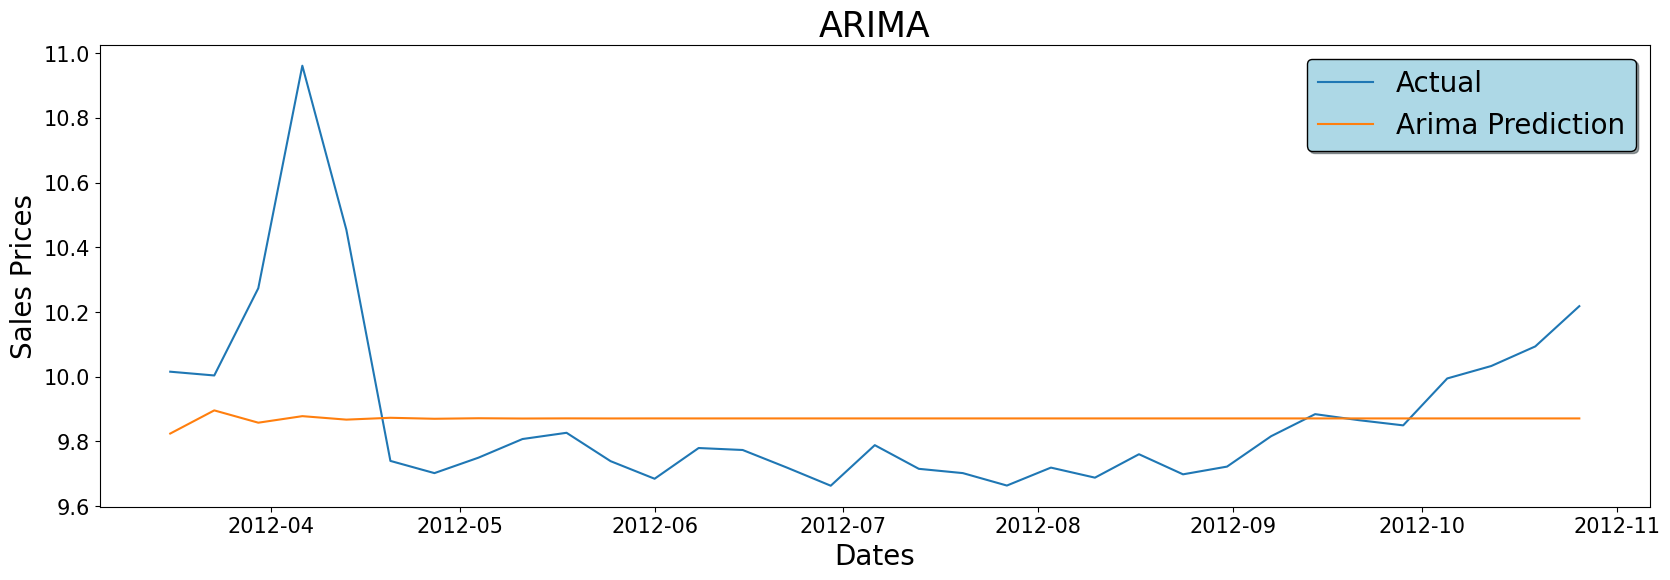

In [138]:
plt.figure(figsize=(20,6))
plt.plot(test.index,test,label='Actual')
plt.plot(test.index,arima_prediction,label='Arima Prediction')
plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('ARIMA', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


Forcast

In [139]:
forcast_arima_model=ARIMA(log_data,order=(1,1,1))

forcast_arima_model_fit=forcast_arima_model.fit()

arima_forcast=forcast_arima_model_fit.get_forecast(steps=8)

arima_forcast_mean=arima_forcast.predicted_mean

arima_conf=arima_forcast.conf_int()

arima_original_forecast=np.exp(arima_forcast_mean)

arima_original_forecast.head(2)

,predicted_mean
2012-11-02,27759.141244
2012-11-09,27572.358523


In [140]:
'''last=log_data.index[-1]
future_index=pd.date_range(start=last+pd.Timedelta(weeks=1),periods=8,freq='W')
arima_forcast_mean.index=future_index
arima_original_forecast.index=future_index
arima_original_forecast.head(2)'''

"last=log_data.index[-1]\nfuture_index=pd.date_range(start=last+pd.Timedelta(weeks=1),periods=8,freq='W')\narima_forcast_mean.index=future_index\narima_original_forecast.index=future_index\narima_original_forecast.head(2)"

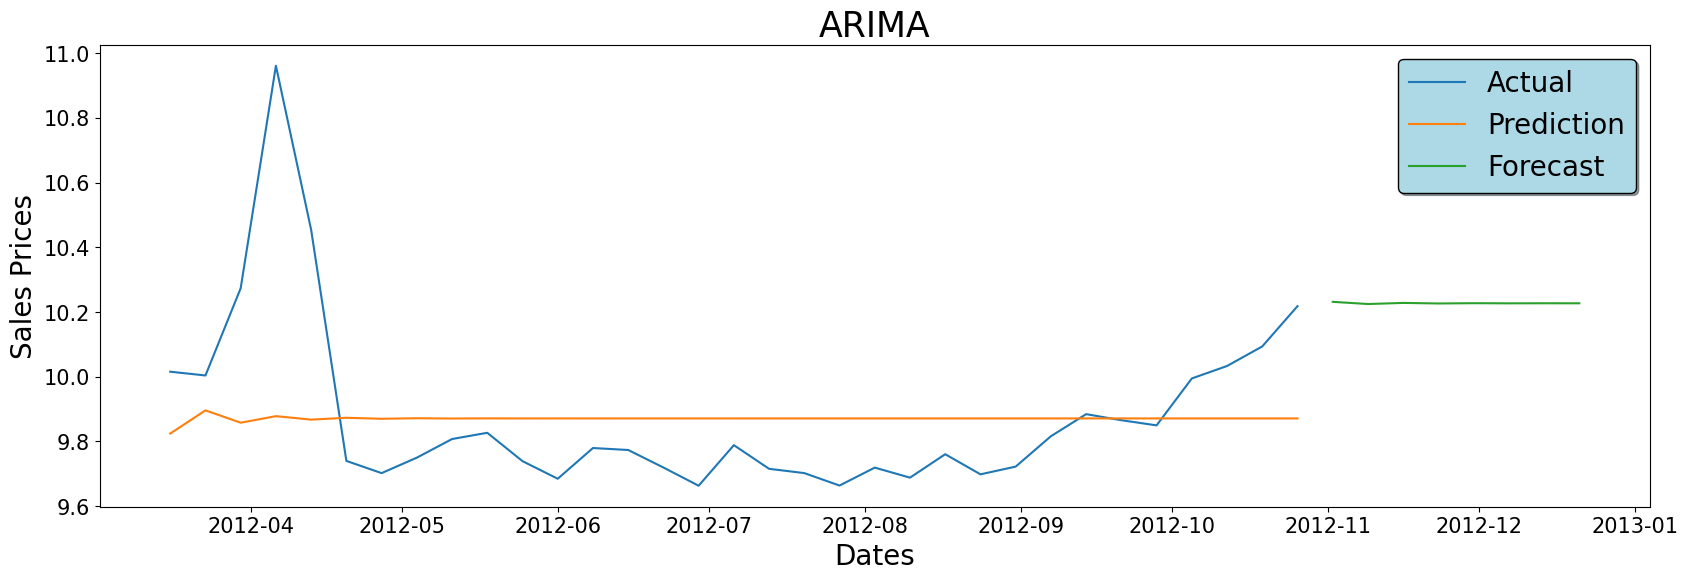

In [141]:
plt.figure(figsize=(20,6))
plt.plot(test.index,test,label='Actual')
plt.plot(test.index,arima_prediction,label='Prediction')
plt.plot(arima_forcast_mean.index,arima_forcast_mean,label='Forecast')
plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('ARIMA', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

plt.show()

SARIMAX

In [142]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [143]:
sarimax_model=SARIMAX(train,order=(1,0,2),seasonal_order=(2,0,0,52))

In [144]:
sarimax_fit=sarimax_model.fit()

In [145]:
sarimax_prediction=sarimax_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)#y pred on test data
np.exp(sarimax_prediction.head(2))

,predicted_mean
2012-03-16,20268.747311
2012-03-23,23309.723293


In [146]:
'''sd=test.index[0]
ed=test.index[-1]

sarimax_predd=sarimax_fit.predict(start=sd,end=ed)#y pred on test data
np.exp(sarimax_predd.head())'''

'sd=test.index[0]\ned=test.index[-1]\n\nsarimax_predd=sarimax_fit.predict(start=sd,end=ed)#y pred on test data\nnp.exp(sarimax_predd.head())'

In [148]:
best_aic = float('inf')
best_order = None
best_seasonal_order = None

for p in range(3):
    for d in [1]:
        for q in range(3):
            for P in range(3):
                for D in [1]:
                    for Q in range(3):
                        try:
                            model = SARIMAX(train,
                                            order=(p,d,q),
                                            seasonal_order=(P,D,Q,52),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
                            results = model.fit(disp=False)
                            if results.aic < best_aic:
                                best_aic = results.aic
                                best_order = (p,d,q)
                                best_seasonal_order = (P,D,Q,52)
                        except:
                            continue

print('Best AIC:', best_aic)
print('Best order:', best_order)
print('Best seasonal_order:', best_seasonal_order)


Best AIC: -20.932095707262285
Best order: (2, 1, 1)
Best seasonal_order: (0, 1, 1, 52)


In [149]:

print("MSE:",mean_squared_error(np.exp(test),np.exp(sarimax_prediction)))
print("MAE:",mean_absolute_error(np.exp(test),np.exp(sarimax_prediction)))
print("RMSE:",np.sqrt(mean_squared_error(np.exp(test),np.exp(sarimax_prediction))))

MSE: 35790850.14117082
MAE: 2710.329076893376
RMSE: 5982.545456674008


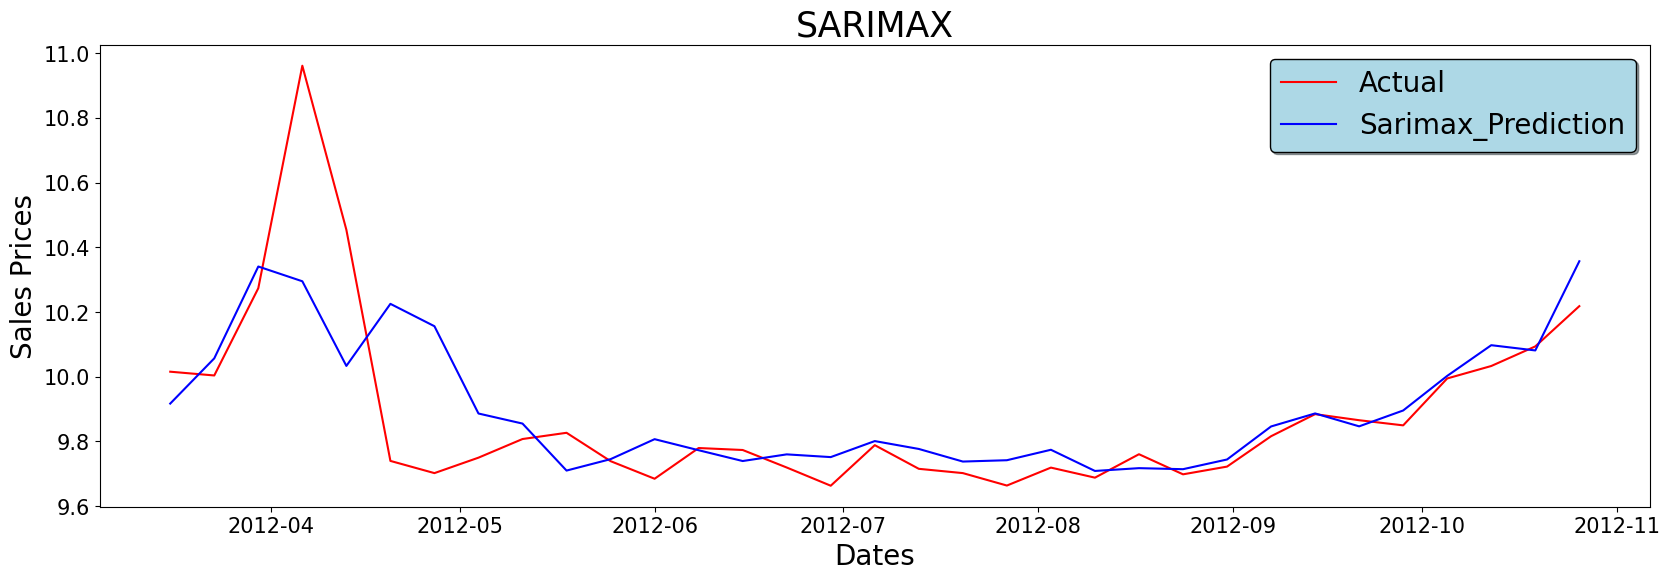

In [150]:
plt.figure(figsize=(20,6))
#plt.plot(train.index,train,label='Train')
plt.plot(test.index,test,label='Actual',color='red')
plt.plot(test.index,sarimax_prediction,label='Sarimax_Prediction',color='blue')
plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('SARIMAX', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


Forcast

In [151]:
'''sarimax_last=log_data.index[-1]
sarimax_future_index=pd.date_range(start=sarimax_last+pd.Timedelta(weeks=1),periods=8,freq='W')
sarimax_forcast_mean.index=sarimax_future_index
sarima_original_forecast.index=sarimax_future_index
sarima_original_forecast.head(2)'''

"sarimax_last=log_data.index[-1]\nsarimax_future_index=pd.date_range(start=sarimax_last+pd.Timedelta(weeks=1),periods=8,freq='W')\nsarimax_forcast_mean.index=sarimax_future_index\nsarima_original_forecast.index=sarimax_future_index\nsarima_original_forecast.head(2)"

In [152]:
forcast_sarimax_model=SARIMAX(log_data,order=(1,0,2),seasonal_order=(2,0,0,52))

forcast_sarimax_model_fit=forcast_sarimax_model.fit()

sarimax_forcast=forcast_sarimax_model_fit.get_forecast(steps=8)

sarimax_forcast_mean=sarimax_forcast.predicted_mean

sarimax_conf=sarimax_forcast.conf_int()

sarima_original_forecast=np.exp(sarimax_forcast_mean)

sarima_original_forecast.head(2)

,predicted_mean
2012-11-02,27745.734728
2012-11-09,19418.033311


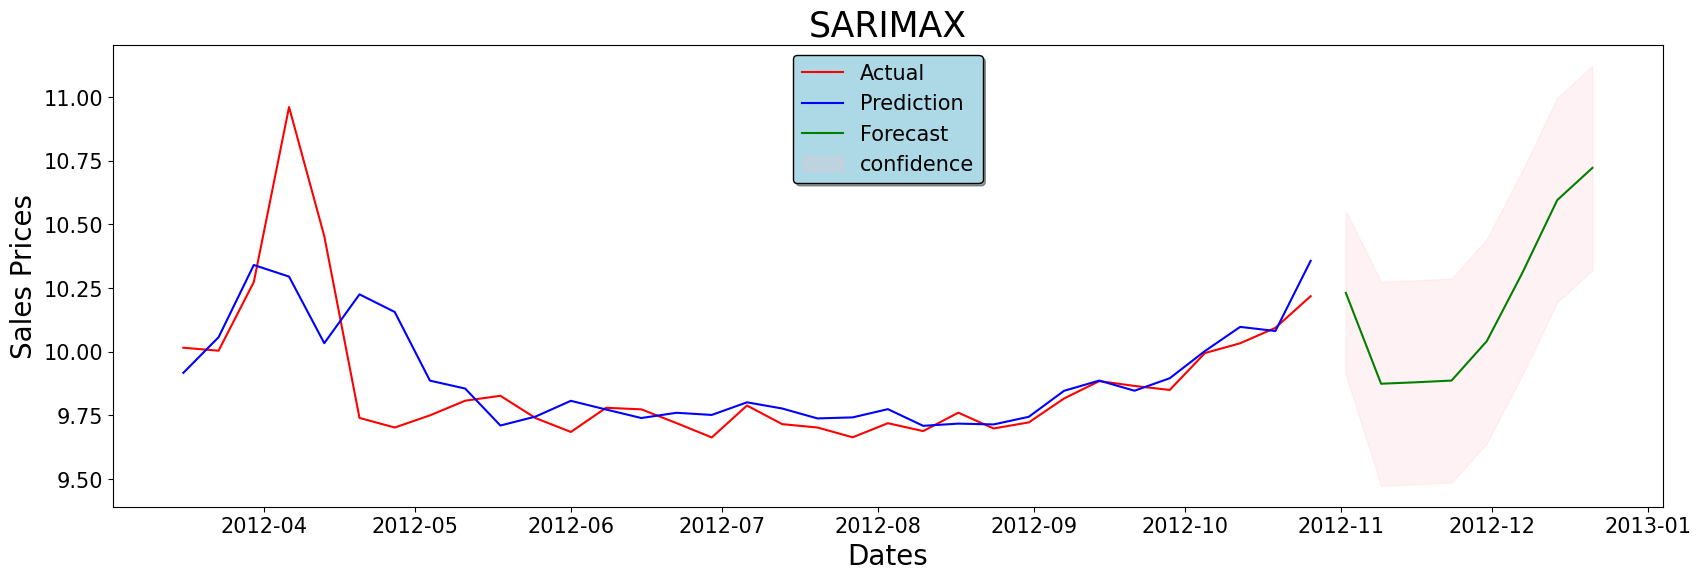

In [153]:
plt.figure(figsize=(20,6))
#plt.plot(train.index,train,label='Train')
plt.plot(test.index,test,label='Actual',color='red')

plt.plot(test.index,sarimax_prediction,label='Prediction',color='blue')

plt.plot(sarimax_forcast_mean.index,sarimax_forcast_mean,label='Forecast',color='green')

plt.fill_between(sarimax_forcast_mean.index,sarimax_conf.iloc[:,0],sarimax_conf.iloc[:,1],color='pink',alpha=0.2,label='confidence')

plt.legend(loc='best', fontsize = 15, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('SARIMAX', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


Get Parameters of sarimax

In [77]:
#pip install pmdarima

In [78]:
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [154]:
auto_model=auto_arima(train,seasonal=True,m=52,trace=True,suppress_warnings=True,stepwise=True)

NameError: name 'auto_arima' is not defined

In [155]:
auto_model.summary()

NameError: name 'auto_model' is not defined

Facebook Prophet Model

In [231]:
from prophet import Prophet
model_prohet=Prophet(changepoint_prior_scale=0.01)


In [204]:
Prophet_data=data.reset_index()

In [158]:
'''Prophet_data=df[['Date','Weekly_Sales','Store','Dept','IsHoliday']]
Prophet_data=Prophet_data[(Prophet_data['Store']==1)& (Prophet_data['Dept']==1)]
Prophet_data=Prophet_data.drop('Store',axis=1)
Prophet_data=Prophet_data.drop('Dept',axis=1)
Prophet_data.head(1)
model_prohet.add_regressor('IsHoliday')
Prophet_data['Weekly_Sales']=np.log1p(Prophet_data['Weekly_Sales'])

Prophet_data=Prophet_data.rename(columns={'Date':'ds','Weekly_Sales':'y'})
'''

"Prophet_data=df[['Date','Weekly_Sales','Store','Dept','IsHoliday']]\nProphet_data=Prophet_data[(Prophet_data['Store']==1)& (Prophet_data['Dept']==1)]\nProphet_data=Prophet_data.drop('Store',axis=1)\nProphet_data=Prophet_data.drop('Dept',axis=1)\nProphet_data.head(1)\nmodel_prohet.add_regressor('IsHoliday')\nProphet_data['Weekly_Sales']=np.log1p(Prophet_data['Weekly_Sales'])\n\nProphet_data=Prophet_data.rename(columns={'Date':'ds','Weekly_Sales':'y'})\n"

In [206]:
Prophet_data['Weekly_Sales']=np.log1p(Prophet_data['Weekly_Sales'])
Prophet_data.head()

,Date,Weekly_Sales
0,2010-02-05,10.123647
1,2010-02-12,10.737277
2,2010-02-19,10.635773
3,2010-02-26,9.873262
4,2010-03-05,9.990990


In [207]:
Prophet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [208]:

Prophet_data=Prophet_data.rename(columns={'Date':'ds','Weekly_Sales':'y'})

In [212]:
prophet_train=Prophet_data.iloc[:115]
prophet_test=Prophet_data.iloc[115:]
prophet_train.head()

,ds,y
0,2010-02-05,10.123647
1,2010-02-12,10.737277
2,2010-02-19,10.635773
3,2010-02-26,9.873262
4,2010-03-05,9.990990


In [213]:
prophet_test.tail()

,ds,y
138,2012-09-28,9.849496
139,2012-10-05,9.994492
140,2012-10-12,10.032980
141,2012-10-19,10.093540
142,2012-10-26,10.217999


In [214]:

prophet_fit=model_prohet.fit(prophet_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu3syw8tf/frd5d2ta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu3syw8tf/d18ldf_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79685', 'data', 'file=/tmp/tmpu3syw8tf/frd5d2ta.json', 'init=/tmp/tmpu3syw8tf/d18ldf_6.json', 'output', 'file=/tmp/tmpu3syw8tf/prophet_modelcxxf63z0/prophet_model-20250727170320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:03:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:03:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [218]:
prohet_pred=prophet_fit.predict(prophet_test)
prohet_pred.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-04-20,9.990402,10.007207,10.532868,9.990402,9.990402,0.276577,0.276577,0.276577,0.276577,0.276577,0.276577,0.0,0.0,0.0,10.266978
1,2012-04-27,9.990805,9.876894,10.398813,9.990803,9.990806,0.136362,0.136362,0.136362,0.136362,0.136362,0.136362,0.0,0.0,0.0,10.127166
2,2012-05-04,9.991207,9.734990,10.226279,9.991204,9.991210,-0.014091,-0.014091,-0.014091,-0.014091,-0.014091,-0.014091,0.0,0.0,0.0,9.977117
3,2012-05-11,9.991610,9.563725,10.090575,9.991605,9.991616,-0.168193,-0.168193,-0.168193,-0.168193,-0.168193,-0.168193,0.0,0.0,0.0,9.823417
4,2012-05-18,9.992013,9.446586,9.962762,9.992005,9.992022,-0.282911,-0.282911,-0.282911,-0.282911,-0.282911,-0.282911,0.0,0.0,0.0,9.709101


In [225]:
prohet_pred[['ds']].assign(yhat=np.exp(prohet_pred['yhat'])).head()#y_pred

,ds,yhat
0,2012-04-20,28766.835407
1,2012-04-27,25013.381600
2,2012-05-04,21528.152105
3,2012-05-11,18461.028914
4,2012-05-18,16466.798050


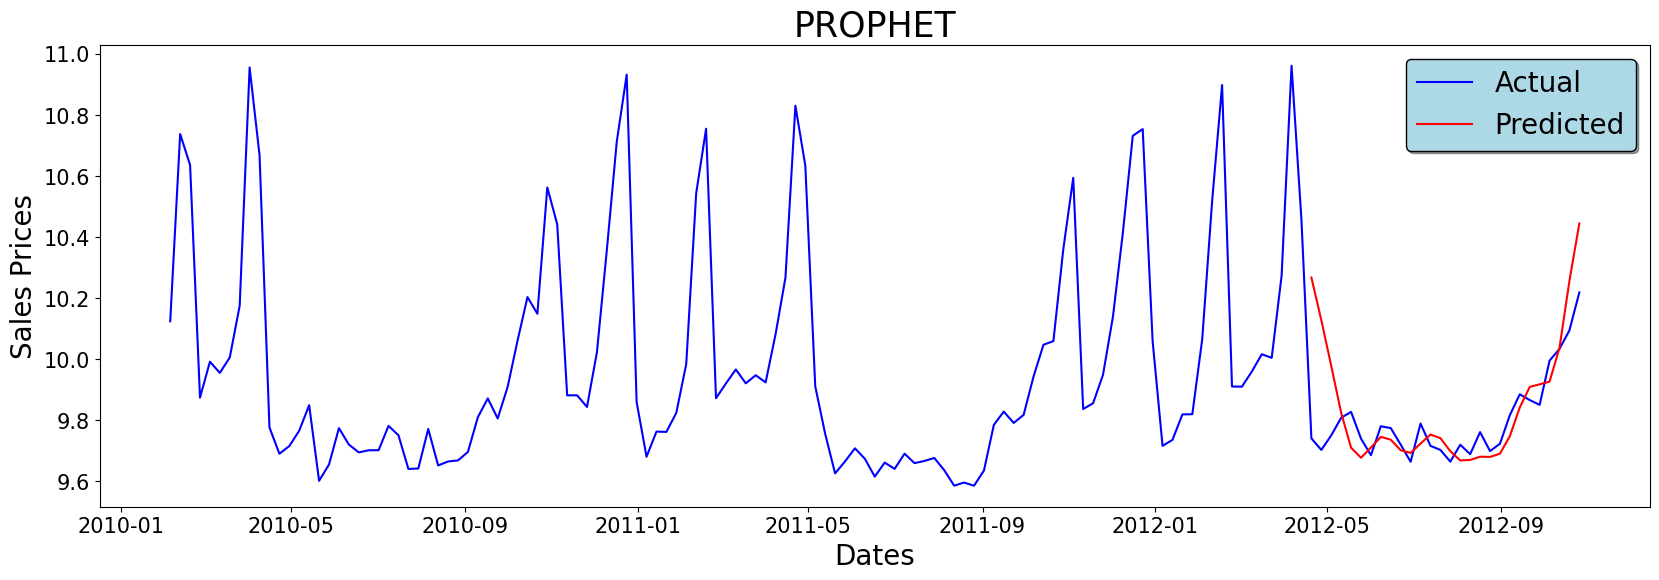

In [226]:

plt.figure(figsize=(20,6))  #full data and pred test


plt.plot(Prophet_data['ds'],Prophet_data['y'],label='Actual',color='blue')

plt.plot(prophet_prediction['ds'],prophet_prediction['yhat'],label='Predicted',color='red')

plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('PROPHET', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


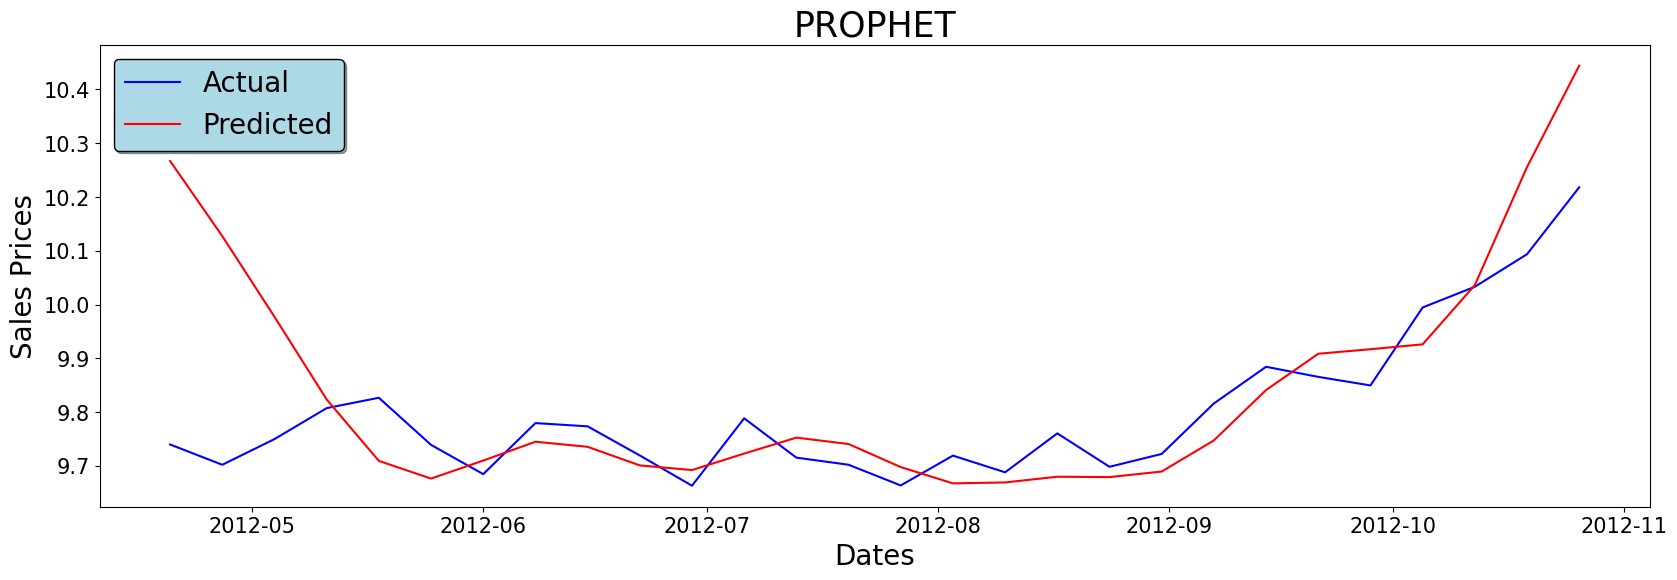

In [184]:
plt.figure(figsize=(20,6)) #test and test prediction


plt.plot(prophet_test['ds'],prophet_test['y'],label='Actual',color='blue')
plt.plot(prophet_prediction['ds'],prophet_prediction['yhat'],label='Predicted',color='red')

plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('PROPHET', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()



In [185]:

y_true=prophet_test['y']
y_pred=prophet_prediction['yhat']

In [186]:
print("MSE:",mean_squared_error(y_true,y_pred))
print("MAE:",mean_absolute_error(y_true,y_pred))            #ACTUAL
print("RMSE:",np.sqrt(mean_squared_error(y_true,y_pred)))

MSE: 0.023127183306476864
MAE: 0.09223625519632657
RMSE: 0.15207624175549864


In [198]:
print("MSE:",mean_squared_error(np.expm1(y_true),np.expm1(y_pred)))
print("MAE:",mean_absolute_error(np.expm1(y_true),np.expm1(y_pred)))                   #LOG DATA
print("RMSE:",np.sqrt(mean_squared_error(np.expm1(y_true),np.expm1(y_pred))))

MSE: 11372677.255272245
MAE: 1923.8680566223775
RMSE: 3372.340026639106


Forcast

In [232]:
prophet_fit_forcsat=model_prohet.fit(Prophet_data) #Forecast include fulldata and original
future_data = prophet_fit_forcsat.make_future_dataframe(periods=16, freq = 'W')
prophet_forecast = model_prohet.predict(future_data)
prophet_forecast[['ds','trend']].head()
prophet_forecast[['ds']].assign(yhat=np.exp(prophet_forecast['yhat'])).head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu3syw8tf/r7hnjw2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu3syw8tf/cgev5el2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60617', 'data', 'file=/tmp/tmpu3syw8tf/r7hnjw2d.json', 'init=/tmp/tmpu3syw8tf/cgev5el2.json', 'output', 'file=/tmp/tmpu3syw8tf/prophet_modelz9wtdotw/prophet_model-20250727171739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat
0,2010-02-05,30305.235725
1,2010-02-12,36556.297392
2,2010-02-19,34412.172544
3,2010-02-26,26416.202383
4,2010-03-05,19968.688414


In [234]:
future_forcast=prophet_forecast[prophet_forecast['ds']>prophet_test['ds'].max()]#Forecast after full data and oringinal
future_forcast.head()
future_forcast[['ds']].assign(yhat=np.exp(future_forcast['yhat'])).head()


,ds,yhat
143,2012-10-28,32451.847734
144,2012-11-04,30217.052735
145,2012-11-11,23295.938699
146,2012-11-18,18315.873737
147,2012-11-25,18452.312655


<Figure size 2000x600 with 0 Axes>

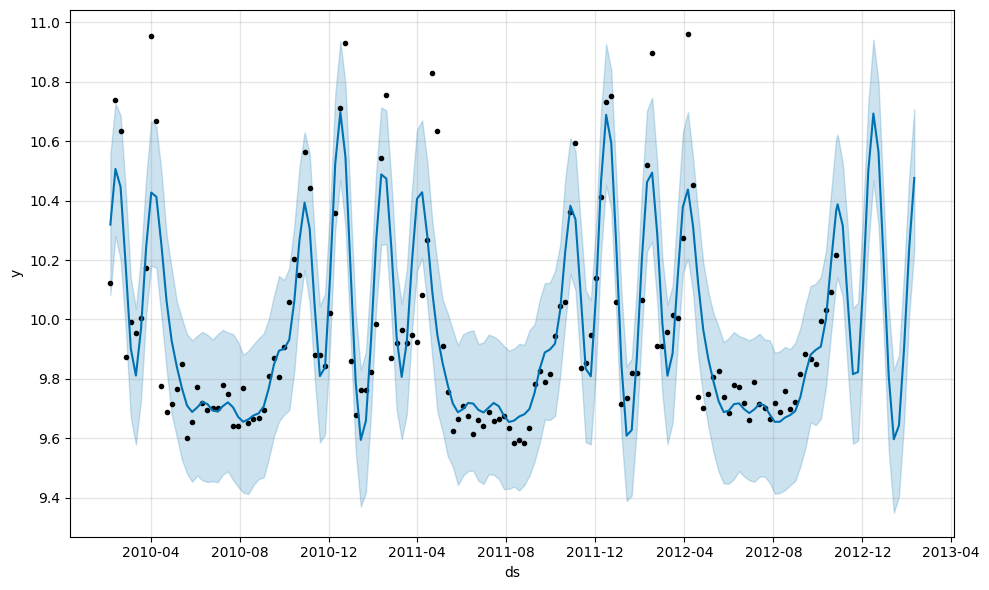

<Figure size 2000x600 with 0 Axes>

In [235]:
model_prohet.plot(prophet_forecast)
plt.figure(figsize=(20,6))

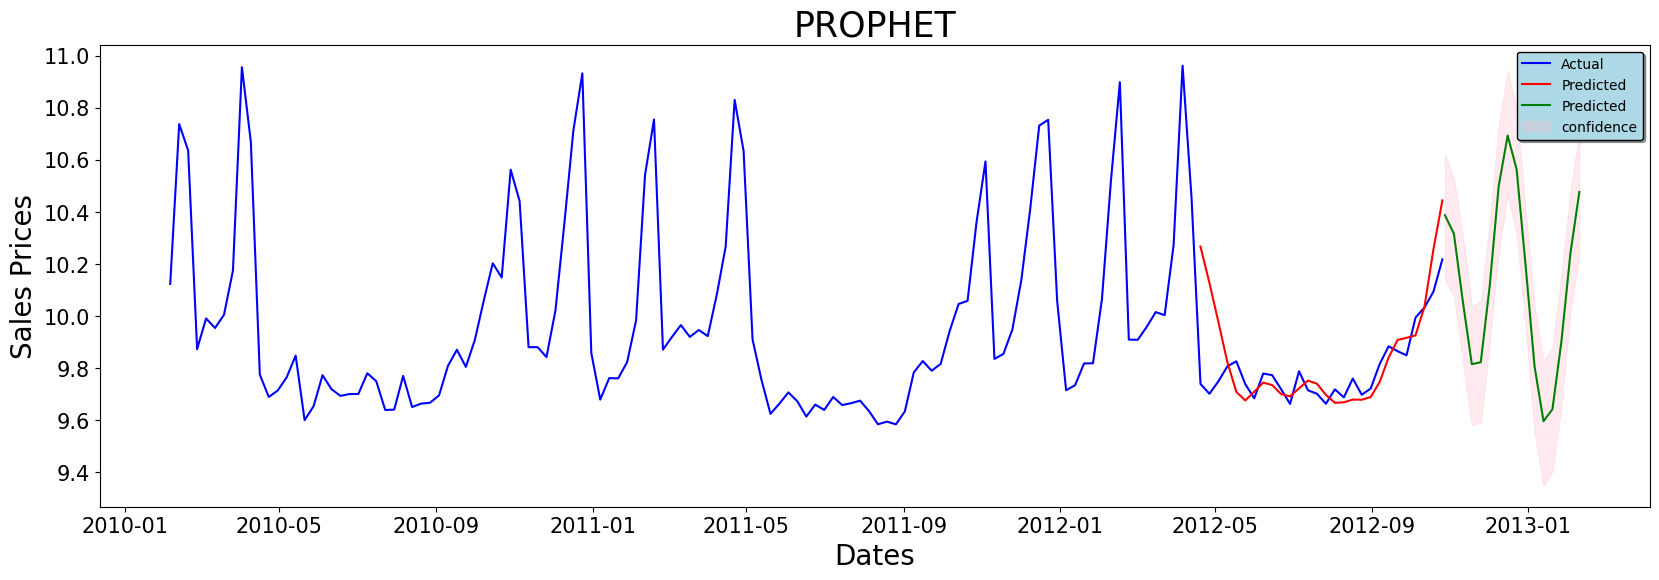

In [236]:
plt.figure(figsize=(20,6))

plt.plot(Prophet_data['ds'],Prophet_data['y'],label='Actual',color='blue')

plt.plot(prophet_predicted['ds'],prophet_predicted['yhat'],label='Predicted',color='red')

plt.plot(future_forcast['ds'],future_forcast['yhat'],label='Predicted',color='green')

plt.fill_between(future_forcast['ds'],future_forcast['yhat_lower'],future_forcast['yhat_upper'],color='pink',alpha=0.3,label='confidence')

plt.legend(loc='upper right', fontsize = 10, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.title('PROPHET', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Sales Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()




In [197]:
{'year': 'A',
'quarter': 'Q',
'month': 'M',
'week': 'W',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}

{'year': 'A',
 'quarter': 'Q',
 'month': 'M',
 'week': 'W',
 'day': 'D',
 'hour': 'H',
 'minute': 'T',
 'second': 'S',
 'millisecond': 'L',
 'microsecond': 'U',
 'nanosecond': 'N'}